بسم الله الرحمن الرحيم

# Libs

In [1]:
!pip install ultralytics --q

In [2]:
import os
from ultralytics import YOLO

# Data

In [3]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="6PmWwWGuf8e5zu287kzQ")
project = rf.workspace("workenv-dayet").project("candy-g6wfi")
version = project.version(4)
dataset = version.download("yolov11")


loading Roboflow workspace...
loading Roboflow project...


In [5]:
model = YOLO('yolo11s.pt')

In [6]:
results = model.train(data='/content/Candy-4/data.yaml', epochs=60, project='yolo_train', name='log', device=[0],imgsz=640)

Ultralytics 8.3.201 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/Candy-4/data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=60, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11s.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=log, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, pr

In [7]:
myModel = YOLO('/content/yolo_train/log/weights/best.pt')

In [9]:
myModel.predict(source="/content/Candy-4/valid/images",save=True)


image 1/34 /content/Candy-4/valid/images/0414530e-candy_58_jpg.rf.bdd4c2a8c03d57c21c20392ecdeb1f70.jpg: 640x640 1 MMs_peanut, 1 milky_way, 1 starbust, 2 twizzlerss, 15.7ms
image 2/34 /content/Candy-4/valid/images/0425e3c8-candy_59_jpg.rf.322fa6d7d849dad10f4b7b2436eef3ec.jpg: 640x640 1 MMs_peanut, 1 MMs_regular, 2 airheadss, 1 gummy_worms, 1 skittles, 1 snickers, 16.7ms
image 3/34 /content/Candy-4/valid/images/0873acf3-candy_40_jpg.rf.038dca4f5fc15759c79c49009a907682.jpg: 640x640 1 MMs_peanut, 1 airheads, 1 nerds, 1 skittles, 1 twizzlers, 17.0ms
image 4/34 /content/Candy-4/valid/images/09563069-candy_12_jpg.rf.4edfe2e2daaa34563fcbdea0188b1364.jpg: 640x640 1 airheads, 1 nerds, 1 skittles, 2 snickerss, 15.6ms
image 5/34 /content/Candy-4/valid/images/09f85b64-candy_19_jpg.rf.a68c7b1d4add1dac0d7e1dd83eaf40e8.jpg: 640x640 3 airheadss, 1 gummy_worms, 1 skittles, 1 three_musketeers, 15.6ms
image 6/34 /content/Candy-4/valid/images/0f517684-candy_69_jpg.rf.1dd75db93b1ec1e809e12c1ca84f31bd.jpg: 

[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'Bounty', 1: 'Dare_caramel', 2: 'Dare_cocoa', 3: 'MMs_peanut', 4: 'MMs_regular', 5: 'Mars', 6: 'Twix_caramel', 7: 'Twix_clasic', 8: 'Twix_white', 9: 'airheads', 10: 'eugenia', 11: 'gummy_worms', 12: 'milky_way', 13: 'nerds', 14: 'skittles', 15: 'snickers', 16: 'snickers_creamy', 17: 'starbust', 18: 'three_musketeers', 19: 'twizzlers'}
 obb: None
 orig_img: array([[[50, 41, 37],
         [55, 46, 42],
         [59, 50, 46],
         ...,
         [43, 33, 33],
         [44, 34, 34],
         [45, 35, 35]],
 
        [[50, 41, 37],
         [54, 45, 41],
         [58, 49, 45],
         ...,
         [42, 32, 32],
         [42, 32, 32],
         [43, 33, 33]],
 
        [[52, 41, 37],
         [56, 45, 41],
         [59, 48, 44],
         ...,
         [40, 30, 30],
         [39, 29, 29],
         [39, 29, 29]],
 
        ...,
 
        [[

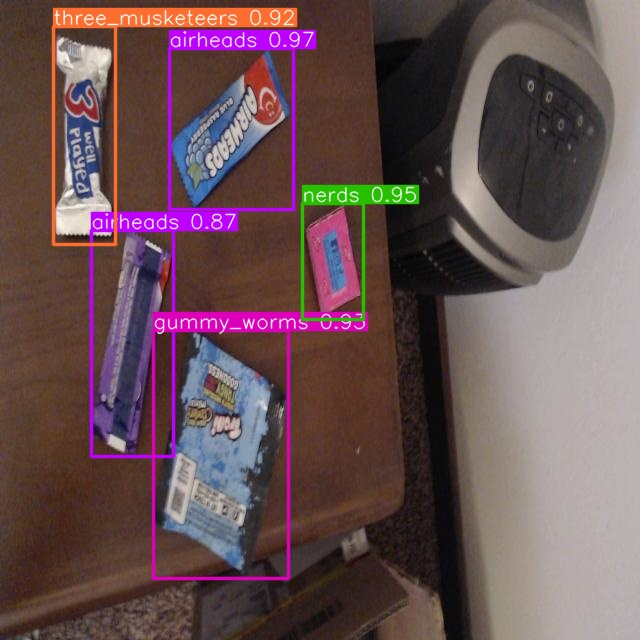

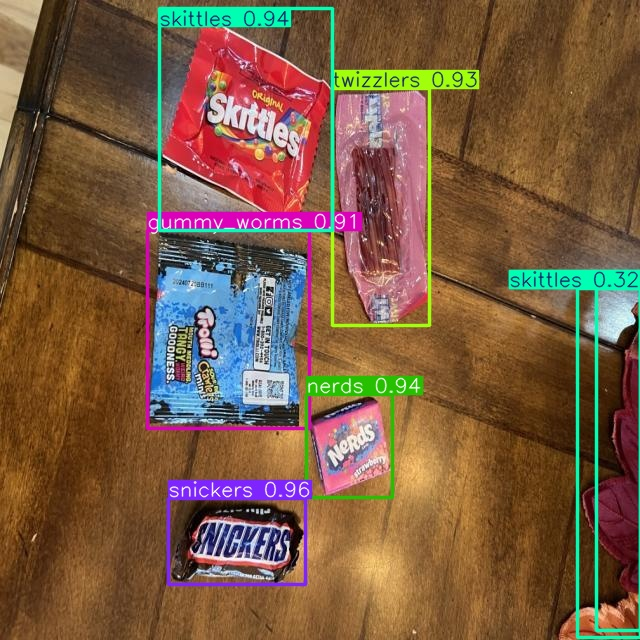

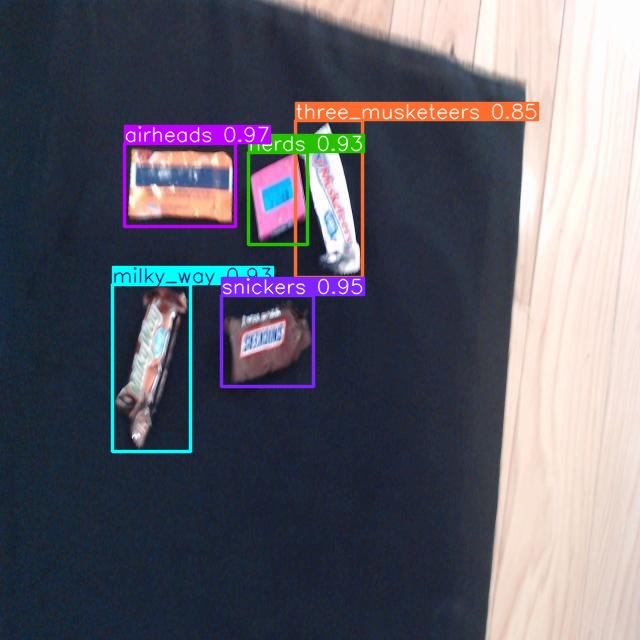

In [10]:
import glob
from IPython.display import Image, display
for image_path in glob.glob('/content/runs/detect/predict/*.jpg')[:3]:
      display(Image(filename=image_path, height=400))
      print("\n")